In [286]:
# import library
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve,plot_precision_recall_curve
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [287]:
# read dataset
dataset = pd.read_csv('data.csv')

In [288]:
# view dataset
dataset.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [289]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [290]:
# drop columns 
dataset.drop(['pickup_time', 'delivered_time','cancelled_time'],axis=1,inplace=True)

In [291]:
# find number of null values
dataset.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
dtype: int64

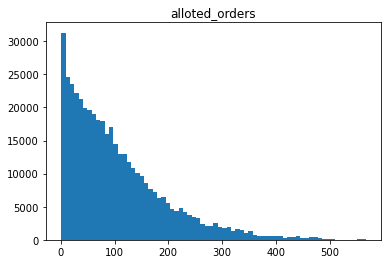

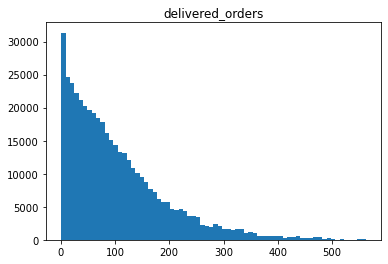

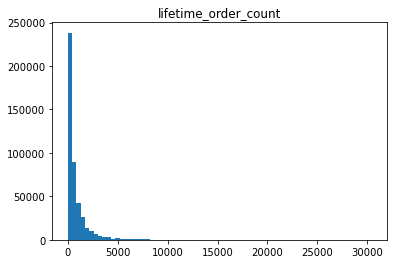

In [292]:
# plot 
plt.hist(dataset['alloted_orders'], bins=70)
plt.title('alloted_orders')
plt.show()
plt.hist(dataset['delivered_orders'], bins=70)
plt.title('delivered_orders')
plt.show()
plt.hist(dataset['lifetime_order_count'], bins=70)
plt.title('lifetime_order_count')
plt.show()

In [293]:
# fill in null values
dataset['accept_time_NA'] = np.where(dataset['accept_time'].isnull(),1,0)
dataset['alloted_orders_NA'] = np.where(dataset['alloted_orders'].isnull(),1,0)
dataset['delivered_orders_NA'] = np.where(dataset['delivered_orders'].isnull(),1,0)
dataset['undelivered_orders_NA'] = np.where(dataset['undelivered_orders'].isnull(),1,0)
dataset['lifetime_order_count_NA'] = np.where(dataset['lifetime_order_count'].isnull(),1,0)
dataset['reassigned_order'] = np.where(dataset['reassigned_order'].isnull(),0,1)
dataset['session_time_NA'] = np.where(dataset['session_time'].isnull(),1,0)

In [294]:
# fill null values
dataset['reassignment_method'].fillna('none',inplace=True)
dataset['reassignment_reason'].fillna('none',inplace=True)

In [295]:
# view datatypes of each col 
dataset.dtypes

order_time                  object
order_id                     int64
order_date                  object
allot_time                  object
accept_time                 object
rider_id                     int64
first_mile_distance        float64
last_mile_distance         float64
alloted_orders             float64
delivered_orders           float64
cancelled                    int64
undelivered_orders         float64
lifetime_order_count       float64
reassignment_method         object
reassignment_reason         object
reassigned_order             int32
session_time               float64
accept_time_NA               int32
alloted_orders_NA            int32
delivered_orders_NA          int32
undelivered_orders_NA        int32
lifetime_order_count_NA      int32
session_time_NA              int32
dtype: object

In [296]:
# convert cols from object to datetime
date_col = ['order_time','order_date','allot_time','accept_time']
for col in date_col:
    dataset[col] = pd.to_datetime(dataset[col])


# created two new features
# accept delay is the difference between  accept time and alot time
dataset['accept_delay'] = ((dataset['accept_time'] - dataset['allot_time']).dt.total_seconds().fillna(-30000)).astype(int)
dataset['allot_delay'] = ((dataset['allot_time'] - dataset['order_time']).dt.total_seconds()).astype(int)

# new column to record the day of the week
dataset['day'] = dataset['order_time'].dt.weekday

# new column with the order time converted to minutes
dataset['minutes'] = 60 * dataset['order_time'].dt.hour + dataset['order_time'].dt.minute
    

{'Tuesday': 78965, 'Wednesday': 80462, 'Thursday': 80468, 'Friday': 83548, 'Saturday': 49470, 'Sunday': 39254, 'Monday': 37833}


<AxesSubplot:title={'center':'Day Wise Orders'}>

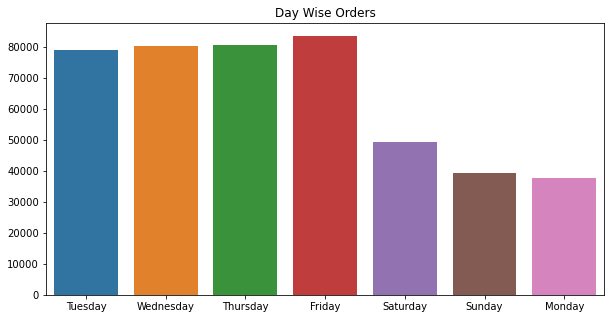

In [297]:
# count the total number of order places on a particular weekday
week = {day:0 for day in range(7)}
start_date = dataset['order_date'].min()
end_date = dataset['order_date'].max()
days_list = [start_date + timedelta(x + 1) for x in range((end_date - start_date).days)]
for day in days_list:
    week[day.weekday()] += 1

order_day = dataset['order_time'].dt.day_name()
orders = {}
for od in order_day:
    try:
        orders[od] += 1
    except:
        orders.setdefault(od,1)

print(orders)

# plot the total number of order against the weekday
plt.figure(figsize=(10,5))
plt.title("Day Wise Orders")
sns.barplot(x=list(orders.keys()), y=list(orders.values()))

In [298]:
#count total normal weekdays and total weekend days
start_date = dataset['order_date'].min()
end_date = dataset['order_date'].max()
daygenerator = [start_date + timedelta(x + 1) for x in range((end_date - start_date).days)]
total_weekdays = sum([1 for day in daygenerator if day.weekday() < 5 and day.weekday() is not 0])
print(total_weekdays)
weekend =  (end_date - start_date).days - total_weekdays

7


[]

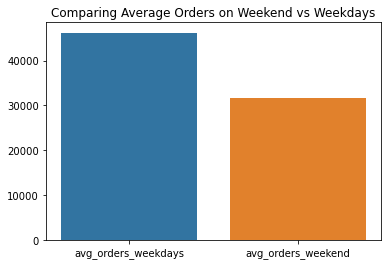

In [299]:
# compare the average order on weekdays vs weekends
week = dataset['order_time'].dt.day_name()
dataset['is_weekend'] = week.apply(lambda x: 1 if (x == 'Saturday' or x=='Sunday' or x=='Monday') else 0)
total_orders_weekend = dataset['is_weekend'].sum()
total_orders_weekdays = dataset.shape[0] - total_orders_weekend
avg_orders_weekdays = total_orders_weekdays/total_weekdays
avg_orders_weekend = total_orders_weekend/weekend

plt.title("Comparing Average Orders on Weekend vs Weekdays")
sns.barplot(x = ['avg_orders_weekdays', 'avg_orders_weekend'], y = [avg_orders_weekdays, avg_orders_weekend])
plt.plot()

In [300]:
# convert the time into minutes
dataset['morning'] = dataset.apply(lambda x: 1 if (x['minutes']> 360 & x['minutes']<= 720) else 0, axis = 1)
dataset['noon'] = dataset.apply(lambda x: 1 if (x['minutes']>720 & x['minutes']<= 960) else 0, axis = 1)
dataset['evening'] = dataset.apply(lambda x: 1 if (x['minutes']> 960 & x['minutes']<= 1260) else 0, axis = 1)
dataset['aftermidnight'] = dataset.apply(lambda x: 1 if (x['minutes']>1260 | (x['minutes']>=0 & x['minutes']<=360)) else 0, axis = 1)


In [301]:
# replace nan values
dataset['delivered_orders'] = dataset['delivered_orders'].replace(np.nan,0).astype(int)
dataset['undelivered_orders'] = dataset['undelivered_orders'].replace(np.nan,0).astype(int)
dataset['alloted_orders'] = dataset['alloted_orders'].replace(np.nan,0).astype(int)
dataset['order_ratio'] = dataset.apply(lambda x:( x['delivered_orders'] / x['alloted_orders'] )if (x['alloted_orders'] != 0) else 2,axis=1)


In [302]:
dataset.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,...,accept_delay,allot_delay,day,minutes,is_weekend,morning,noon,evening,aftermidnight,order_ratio
count,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,449947.000000,450000.000000,...,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000
mean,369143.080767,7763.244016,1.229889,2.968873,100.680653,99.944660,0.011596,0.734718,853.640664,0.030562,...,50.517711,73.199969,2.885242,794.023551,0.281238,0.999624,0.994524,0.988051,0.000004,1.028191
std,131146.906408,5592.880135,0.846183,1.884124,90.637362,90.144218,0.107057,1.056017,1502.976162,0.172129,...,571.586852,275.048691,1.742036,216.618130,0.449604,0.019376,0.073794,0.108656,0.002108,0.195824
min,118350.000000,0.000000,0.000134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-30000.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,31.000000,31.000000,0.000000,0.000000,165.000000,0.000000,...,14.000000,1.000000,1.000000,558.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.989247
50%,369842.500000,6754.000000,1.138700,2.670000,77.000000,77.000000,0.000000,0.000000,396.000000,0.000000,...,37.000000,15.000000,3.000000,866.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,482342.250000,11965.000000,1.853000,4.220000,144.000000,143.000000,0.000000,1.000000,948.000000,0.000000,...,63.000000,48.000000,4.000000,966.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.000000,...,930.000000,32334.000000,6.000000,1301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [303]:
# check sum of num values
dataset.isna().sum()

order_time                    0
order_id                      0
order_date                    0
allot_time                    0
accept_time                 157
rider_id                      0
first_mile_distance           0
last_mile_distance            0
alloted_orders                0
delivered_orders              0
cancelled                     0
undelivered_orders            0
lifetime_order_count         53
reassignment_method           0
reassignment_reason           0
reassigned_order              0
session_time               3675
accept_time_NA                0
alloted_orders_NA             0
delivered_orders_NA           0
undelivered_orders_NA         0
lifetime_order_count_NA       0
session_time_NA               0
accept_delay                  0
allot_delay                   0
day                           0
minutes                       0
is_weekend                    0
morning                       0
noon                          0
evening                       0
aftermid

In [304]:
# label encode the categorical data
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

dataset['reassignment_method'] = le1.fit_transform(dataset['reassignment_method'])
dataset['reassignment_reason'] = le2.fit_transform(dataset['reassignment_reason'])

In [305]:
# fill null values
for df in [dataset]:
    df['session_time'].fillna(-20, inplace=True)
    df['lifetime_order_count'].fillna(-20, inplace=True)

In [306]:
# sepearte numeric cols and categorical cols
numeric_cols = [   
'rider_id',                       
'first_mile_distance','last_mile_distance','lifetime_order_count',           
'alloted_orders','delivered_orders', 'minutes',  'undelivered_orders',             
'session_time','accept_delay','allot_delay','order_ratio'
]

categorical_cols = [
'rider_id',                                            
'reassignment_method','reassignment_reason','day', 'accept_time_NA',
'alloted_orders_NA', 'delivered_orders_NA', 'undelivered_orders_NA',
'lifetime_order_count_NA', 'session_time_NA','morning', 'noon', 'evening','aftermidnight','is_weekend'
]

numeric_dataset = dataset[numeric_cols]
categorical = dataset[categorical_cols]

In [307]:
# groupby by rider id, calculate count, mean, max, min, sum for rider id
agg = numeric_dataset.groupby('rider_id').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

agg_idx = ['count', 'mean', 'max', 'min', 'sum']
num_agg_cols = ['rider_id']
for col in numeric_cols:
    if col is not 'rider_id':
        for agi in agg_idx:
            num_agg_cols.append(col + '_' + agi)

agg.columns = num_agg_cols
dataset = dataset.merge(agg,how = 'left', on = 'rider_id')

In [308]:
# groupby by rider id, calculate sum, mean
cat = categorical.groupby('rider_id').agg(['sum', 'mean']).reset_index()

agg_idx = ['sum', 'mean']
cat_agg_cols = ['rider_id']
for col in categorical_cols:
    if col is not 'rider_id':
        for agi in agg_idx:
            cat_agg_cols.append(col + '_' + agi)

cat.columns = cat_agg_cols
dataset = dataset.merge(cat,how = 'left', on = 'rider_id')


In [309]:
# drop cols from dataset
dataset.drop(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'rider_id',],axis=1,inplace=True)

In [310]:
# split data into train and test
x = dataset.drop('cancelled',axis=1)
y = dataset['cancelled']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.05,stratify=y)

In [311]:
print(x.shape)
print(x_train.shape)

(450000, 109)
(427500, 109)


In [312]:
# function to evaluate the model performance
def model_evaluation(model,x_test,y_test):
    y_pred = model.predict(x_test)
    plot_confusion_matrix(model, x_test,y_test)
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test,y_pred))
    print(f"ROC-AUC score: {roc_auc_score(y_test,model.predict_proba(x_test)[:,1])}")

In [313]:
# function to plot roc curve
def plot_roc_curve(model,X_test,y_test):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # get the best threshold
    J = tpr - fpr
    from numpy import argmax
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    label="AUC = %.3f" % roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    plt.show()


Accuracy: 0.9887298245614035
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    422543
           1       0.65      0.06      0.11      4957

    accuracy                           0.99    427500
   macro avg       0.82      0.53      0.55    427500
weighted avg       0.99      0.99      0.98    427500

ROC-AUC score: 0.7189453637742651
Best Threshold=0.014995


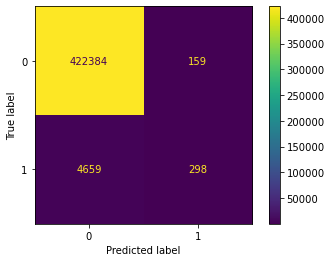

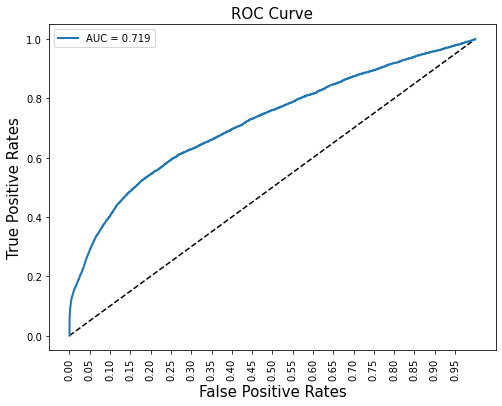

In [314]:
# train logistic regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(random_state=22)
model_1.fit(x_train, y_train)
model_evaluation(model_1,x_train,y_train)
plot_roc_curve(model_1,x_train,y_train)


Accuracy: 0.9882666666666666
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.43      0.04      0.07       261

    accuracy                           0.99     22500
   macro avg       0.71      0.52      0.53     22500
weighted avg       0.98      0.99      0.98     22500

ROC-AUC score: 0.7397750904963304
Best Threshold=0.016831


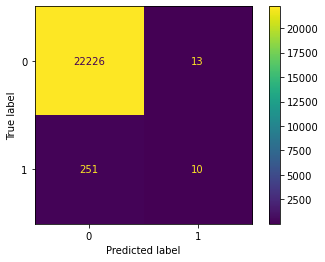

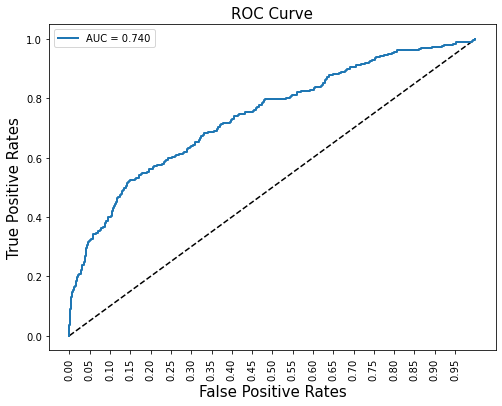

In [315]:
# train logistic regression
model_1 = LogisticRegression(random_state=42)
model_1.fit(x_train, y_train)
model_evaluation(model_1,x_test,y_test)
plot_roc_curve(model_1,x_test,y_test)


Accuracy: 0.9814666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22239
           1       0.22      0.23      0.23       261

    accuracy                           0.98     22500
   macro avg       0.61      0.61      0.61     22500
weighted avg       0.98      0.98      0.98     22500

ROC-AUC score: 0.6119794210543453
Best Threshold=1.000000


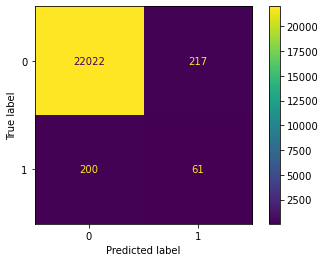

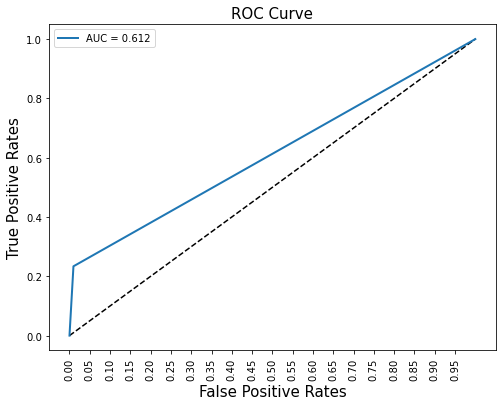

In [316]:
# train decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model_2.fit(x_train, y_train)
model_evaluation(model_2,x_test,y_test)
plot_roc_curve(model_2,x_test,y_test)


Accuracy: 0.9892444444444445
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.68      0.14      0.23       261

    accuracy                           0.99     22500
   macro avg       0.83      0.57      0.61     22500
weighted avg       0.99      0.99      0.99     22500

ROC-AUC score: 0.8153687069710646
Best Threshold=0.010000


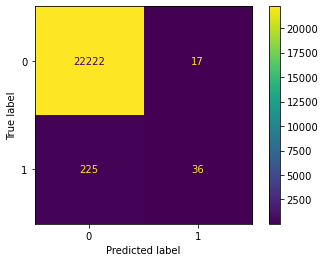

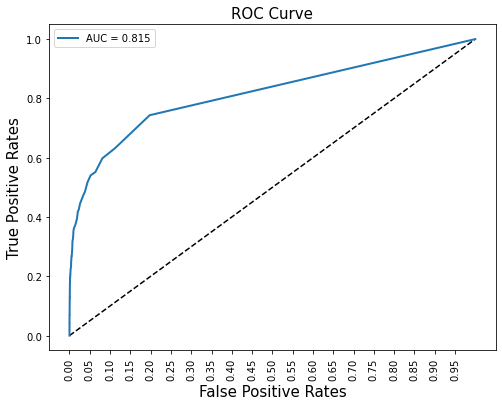

In [317]:
# train random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(random_state=42,criterion='entropy')
model_3.fit(x_train, y_train)
model_evaluation(model_3,x_test,y_test)
plot_roc_curve(model_3,x_test,y_test)

[23:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy: 0.9897333333333334
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.69      0.21      0.32       261

    accuracy                           0.99     22500
   macro avg       0.84      0.60      0.66     22500
weighted avg       0.99      0.99      0.99     22500

ROC-AUC score: 0.923215903027697
Best Threshold=0.007682


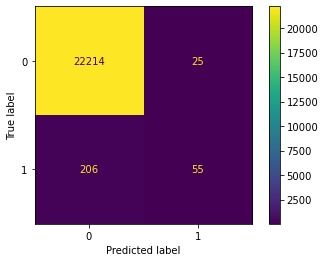

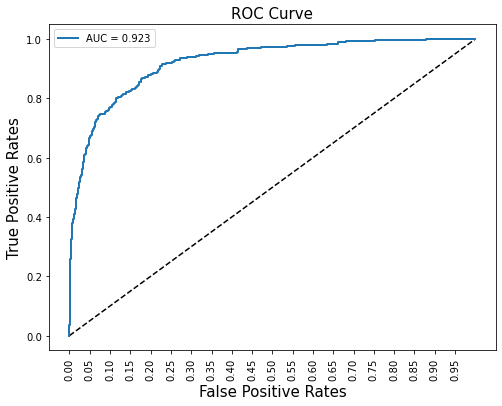

In [318]:
# train xgboost classifier
from xgboost import XGBClassifier
model_4 = XGBClassifier(random_state = 42)
model_4.fit(x_train, y_train)
model_evaluation(model_4,x_test,y_test)
plot_roc_curve(model_4,x_test,y_test)

In [319]:
# under sample data
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
Ras = RandomUnderSampler()
X_under, y_under = Ras.fit_resample(x_train,y_train)
print('Original dataset shape', Counter(y_train))
print('Undersample dataset shape', Counter(y_under))

Original dataset shape Counter({0: 422543, 1: 4957})
Undersample dataset shape Counter({0: 4957, 1: 4957})



Accuracy: 0.7066666666666667
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     22239
           1       0.03      0.69      0.05       261

    accuracy                           0.71     22500
   macro avg       0.51      0.70      0.44     22500
weighted avg       0.98      0.71      0.82     22500

ROC-AUC score: 0.7516888542254047
Best Threshold=0.529436


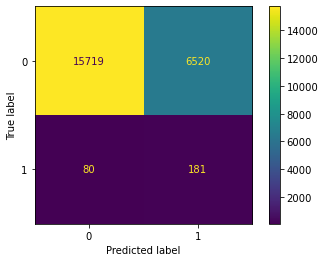

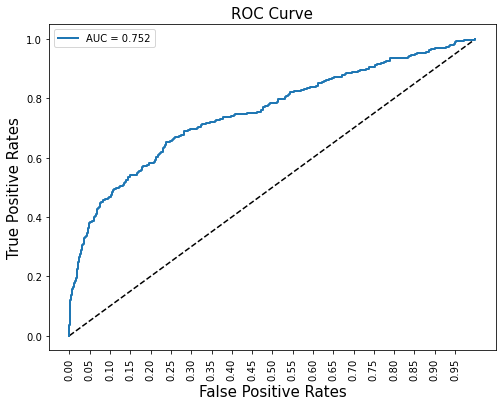

In [320]:
# train logistic regression on undersampled data
from sklearn.linear_model import LogisticRegression
model_5 = LogisticRegression(random_state=42)
model_5.fit(X_under, y_under)
model_evaluation(model_5,x_test,y_test)
plot_roc_curve(model_5,x_test,y_test)


Accuracy: 0.7750666666666667
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     22239
           1       0.04      0.77      0.07       261

    accuracy                           0.78     22500
   macro avg       0.52      0.77      0.47     22500
weighted avg       0.99      0.78      0.86     22500

ROC-AUC score: 0.7726198616596193
Best Threshold=1.000000


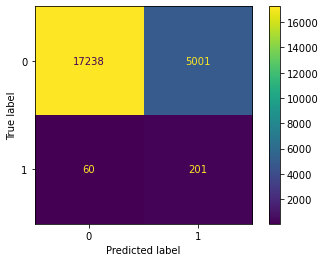

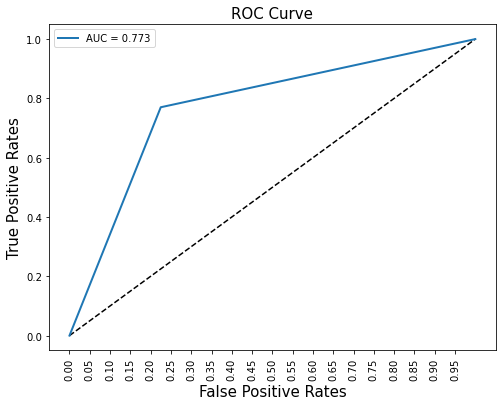

In [321]:
# train decision on undersampled data
model_6 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model_6.fit(X_under, y_under)
model_evaluation(model_6,x_test,y_test)
plot_roc_curve(model_6,x_test,y_test)


Accuracy: 0.8005333333333333
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     22239
           1       0.05      0.82      0.09       261

    accuracy                           0.80     22500
   macro avg       0.52      0.81      0.49     22500
weighted avg       0.99      0.80      0.88     22500

ROC-AUC score: 0.8858761634965601
Best Threshold=0.490000


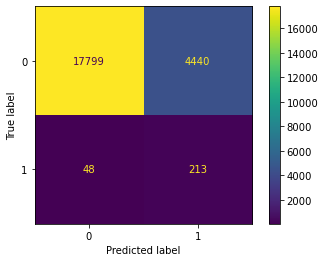

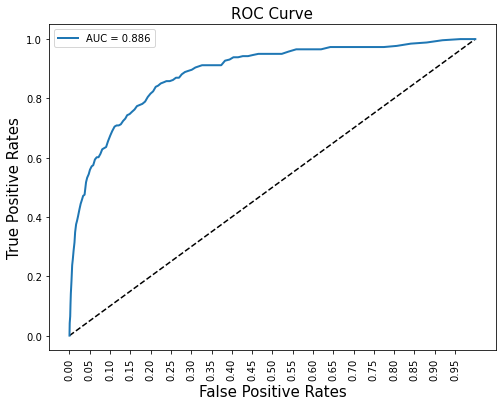

In [322]:

from sklearn.ensemble import RandomForestClassifier
model_7 = RandomForestClassifier(random_state=42,criterion='entropy')
model_7.fit(X_under, y_under)
model_evaluation(model_7,x_test,y_test)
plot_roc_curve(model_7,x_test,y_test)

[23:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy: 0.8298666666666666
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22239
           1       0.06      0.85      0.10       261

    accuracy                           0.83     22500
   macro avg       0.53      0.84      0.50     22500
weighted avg       0.99      0.83      0.90     22500

ROC-AUC score: 0.9139104286608438
Best Threshold=0.450174


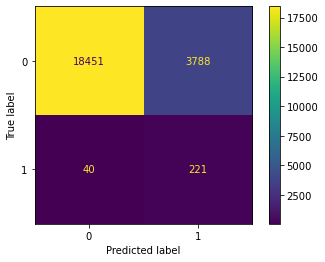

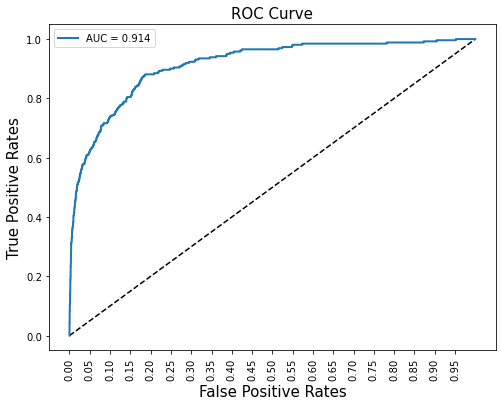

In [323]:
from xgboost import XGBClassifier
model_8 = XGBClassifier(random_state = 42)
model_8.fit(X_under, y_under)
model_evaluation(model_8,x_test,y_test)
plot_roc_curve(model_8,x_test,y_test)